<a href="https://colab.research.google.com/github/ghazaletlbn/my-bachelor-project/blob/main/bachelor_project_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import random
import scipy.sparse as sp
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.sparse.linalg import eigsh
from scipy.stats import pareto, expon, uniform, weibull_min
import math

In [ ]:
def get_algebraic_connectivity(graph):
    eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(graph).todense())
    return sorted(eigenvalues)[1]

def get_laplacian_energy(graph):
    eigenvalues = np.linalg.eigvalsh(nx.laplacian_matrix(graph).todense())
    return np.sum(np.abs(eigenvalues))

def get_spectral_gap(graph):
    eigenvalues = np.linalg.eigvalsh(nx.laplacian_matrix(graph).todense())
    eigenvalues.sort()
    return eigenvalues[1]

def get_natural_connectivity(graph):
    eigenvalues = np.linalg.eigvalsh(nx.adjacency_matrix(graph).todense())
    return np.sum(np.log(np.abs(eigenvalues)))

def get_energy(graph):
    eigenvalues = np.linalg.eigvalsh(nx.laplacian_matrix(graph).todense())
    return np.sum(np.abs(eigenvalues))

In [ ]:
def simulate_graphs(max_nodes, num_edges, num_iterations):
    nodes_range = range(10, max_nodes + 1, 10)
    edges_range = range(20, num_edges+1,20)
    er_algebraic_connectivity = []
    sf_algebraic_connectivity = []
    ws_algebraic_connectivity = []
    er_laplacian_energy = []
    sf_laplacian_energy = []
    ws_laplacian_energy = []
    er_spectral_gap = []
    sf_spectral_gap = []
    ws_spectral_gap = []
    er_natural_connectivity = []
    sf_natural_connectivity = []
    ws_natural_connectivity = []
    er_energy = []
    sf_energy = []
    ws_energy = []

    for num_nodes, num_edges_in_range in it.zip_longest(nodes_range, edges_range):
        er_algebraic_conn = 0
        sf_algebraic_conn = 0
        ws_algebraic_conn = 0
        er_lapl_energy = 0
        sf_lapl_energy = 0
        ws_lapl_energy = 0
        er_spec_gap = 0
        sf_spec_gap = 0
        ws_spec_gap = 0
        er_nat_conn = 0
        sf_nat_conn = 0
        ws_nat_conn = 0
        er_ener = 0
        sf_ener = 0
        ws_ener = 0

        for _ in range(num_iterations):
            # Random ER graph
            er_graph = nx.erdos_renyi_graph(num_nodes,0.5)
            er_algebraic_conn += get_algebraic_connectivity(er_graph)
            er_lapl_energy += get_laplacian_energy(er_graph)
            er_spec_gap += get_spectral_gap(er_graph)
            er_nat_conn += get_natural_connectivity(er_graph)
            er_ener += get_energy(er_graph)

            # Scale-Free graph
            sf_graph = nx.barabasi_albert_graph(num_nodes, num_edges_in_range // num_nodes)
            sf_algebraic_conn += get_algebraic_connectivity(sf_graph)
            sf_lapl_energy += get_laplacian_energy(sf_graph)
            sf_spec_gap += get_spectral_gap(sf_graph)
            sf_nat_conn += get_natural_connectivity(sf_graph)
            sf_ener += get_energy(sf_graph)

            # Watts-Strogatz graph
            ws_graph = nx.watts_strogatz_graph(num_nodes, num_edges_in_range // num_nodes, 0.3)
            ws_algebraic_conn += get_algebraic_connectivity(ws_graph)
            ws_lapl_energy += get_laplacian_energy(ws_graph)
            ws_spec_gap += get_spectral_gap(ws_graph)
            ws_nat_conn += get_natural_connectivity(ws_graph)
            ws_ener += get_energy(ws_graph)

        er_algebraic_conn /= num_iterations
        sf_algebraic_conn /= num_iterations
        ws_algebraic_conn /= num_iterations
        er_lapl_energy /= num_iterations
        sf_lapl_energy /= num_iterations
        ws_lapl_energy /= num_iterations
        er_spec_gap /= num_iterations
        sf_spec_gap /= num_iterations
        ws_spec_gap /= num_iterations
        er_nat_conn /= num_iterations
        sf_nat_conn /= num_iterations
        ws_nat_conn /= num_iterations
        er_ener /= num_iterations
        sf_ener /= num_iterations
        ws_ener /= num_iterations

        er_algebraic_connectivity.append(er_algebraic_conn)
        sf_algebraic_connectivity.append(sf_algebraic_conn)
        ws_algebraic_connectivity.append(ws_algebraic_conn)
        er_laplacian_energy.append(er_lapl_energy)
        sf_laplacian_energy.append(sf_lapl_energy)
        ws_laplacian_energy.append(ws_lapl_energy)
        er_spectral_gap.append(er_spec_gap)
        sf_spectral_gap.append(sf_spec_gap)
        ws_spectral_gap.append(ws_spec_gap)
        er_natural_connectivity.append(er_nat_conn)
        sf_natural_connectivity.append(sf_nat_conn)
        ws_natural_connectivity.append(ws_nat_conn)
        er_energy.append(er_ener)
        sf_energy.append(sf_ener)
        ws_energy.append(ws_ener)

    return nodes_range, er_algebraic_connectivity, sf_algebraic_connectivity, ws_algebraic_connectivity, er_laplacian_energy, sf_laplacian_energy, ws_laplacian_energy, er_spectral_gap, sf_spectral_gap, ws_spectral_gap, er_natural_connectivity, sf_natural_connectivity, ws_natural_connectivity, er_energy, sf_energy, ws_energy



In [ ]:
def plotting(xlable, ylable, title, nodes_range, er, sf, ws):
  plt.plot(nodes_range, er, label='ER')
  plt.plot(nodes_range, sf, label='Scale-Free')
  plt.plot(nodes_range, ws, label='Watts-Strogatz')

  plt.xlabel(xlable)
  plt.ylabel(ylable)
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
# Parameters
max_nodes = 200  # Maximum number of nodes in the graph
num_edges = 400  # Number of edges in the graph
num_iterations = 100  # Number of iterations to average the results

nodes_range, er_algebraic_conn, sf_algebraic_conn, ws_algebraic_conn, er_laplacian_energy, sf_laplacian_energy, ws_laplacian_energy, er_spectral_gap, sf_spectral_gap, ws_spectral_gap, er_natural_conn, sf_natural_conn, ws_natural_conn, er_energy, sf_energy, ws_energy = simulate_graphs(max_nodes, num_edges, num_iterations)


<ipython-input-6-7e3208834e69>:16: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(np.abs(eigenvalues)))


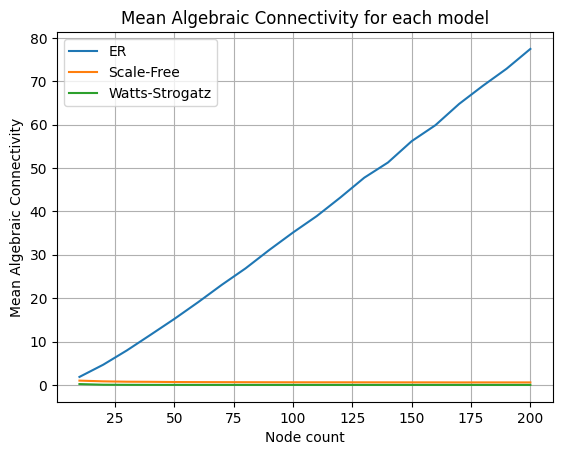

In [ ]:
plotting('Node count', 'Mean Algebraic Connectivity', 'Mean Algebraic Connectivity for each model', nodes_range, er_algebraic_conn, sf_algebraic_conn, ws_algebraic_conn)

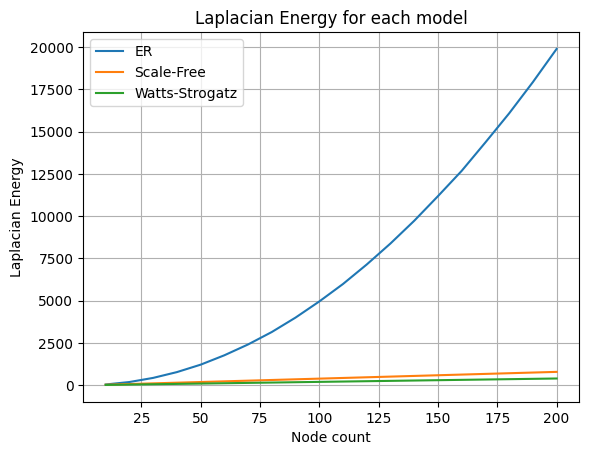

In [ ]:
plotting('Node count', 'Laplacian Energy','Laplacian Energy for each model', nodes_range, er_laplacian_energy, sf_laplacian_energy, ws_laplacian_energy)

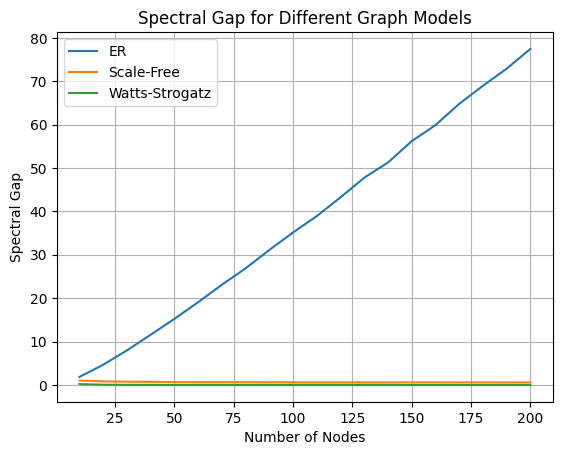

In [ ]:
plotting('Number of Nodes', 'Spectral Gap','Spectral Gap for Different Graph Models', nodes_range, er_spectral_gap, sf_spectral_gap, ws_spectral_gap)

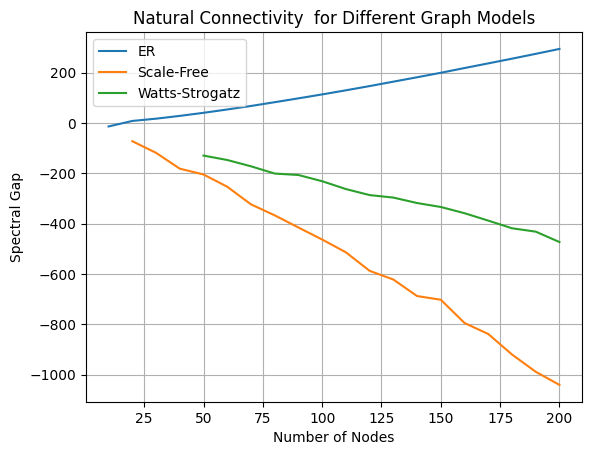

In [ ]:
plotting('Number of Nodes', 'Spectral Gap','Natural Connectivity  for Different Graph Models', nodes_range, er_natural_conn, sf_natural_conn, ws_natural_conn)